# Market basket Analysis:
The objective is to perform Market Basket Analysis between the product types sold by a home based online retail store, selling jewellery and accessories to establish what products are associated to each other in order to boost the sales. 

In [1]:
# import the libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# !pip install mlxtend 
import mlxtend as ml
import os
import datetime

In [2]:
os.getcwd()

'C:\\Users\\akilm\\OneDrive\\Desktop\\Course Handouts\\ML av\\Projects\\MBA'

## Lets have a understanding of what we are dealing with here. 
- This is a sales report of a home-based retail store selling jewellery and accessories. We are going to perform Market Basket Analysis (or) Association rule on this dataset. <br>
- A little insight on the **Product type** or Collection, we are going to perform MBA on, 
    - 'nose pin, 
    - 'Tribal', 
    - 'German silver', 
    - 'Necklace',
    - 'Handmade earrings', 
    - 'Earrings', 
    - 'On sale', 
    - 'Accessories',
    - 'Fashion earrings', 
    - 'Pure silver', 
    - 'Fashion necklace'
- We shall start with our data cleaning, munching and EDA process. 

In [13]:
df=pd.read_excel('sales_2018-01-01_2018-11-01.xlsx')

In [14]:
df.head()

Sale ID                       Date     Order Transaction type  \
0  536343609377  2018-01-02T04:39:28+05:30  #HOJ1566          product   
1  536343543841  2018-01-02T04:39:28+05:30  #HOJ1566          product   
2  536343707681  2018-01-02T04:39:28+05:30  #HOJ1566         shipping   
3  536343642145  2018-01-02T04:39:28+05:30  #HOJ1566          product   
4  536343674913  2018-01-02T04:39:28+05:30  #HOJ1566          product   

  Sale type Sales channel  POS location Billing country Billing region  \
0     order  Online Store           NaN           India      Karnataka   
1     order  Online Store           NaN           India      Karnataka   
2     order  Online Store           NaN           India      Karnataka   
3     order  Online Store           NaN           India      Karnataka   
4     order  Online Store           NaN           India      Karnataka   

  Billing city  ...                Product Variant Variant SKU Net quantity  \
0    Bengaluru  ...                Peacock     NaN         NaN            1   
1    Bengaluru  ...    Tibetan danglers -1   Green         NaN            1   
2    Bengaluru  ...                    NaN     NaN         NaN            0   
3    Bengaluru  ...    Ganesha full silver     NaN         NaN            1   
4    Bengaluru  ...  Basic silver necklace       1         NaN            1   

  Amount (before discount and taxes) Line item discounts Order discount  \
0                                 75                   0            0.0   
1                                525                   0            0.0   
2                                 50                   0            0.0   
3                                 75                   0            0.0   
4                                350                   0            0.0   

   Amount (after discounts before tax)  Taxes  \
0                                 75.0    0.0   
1                                525.0    0.0   
2                                 50.0    0.0   
3                                 75.0    0.0   
4                                350.0    0.0   

   Amount (after discounts and taxes)  
0                                75.0  
1                               525.0  
2                                50.0  
3                                75.0  
4                               350.0  

[5 rows x 25 columns]

In [15]:
df.shape

(2120, 25)

In [16]:
df.isnull().sum() 

Sale ID                                   0
Date                                      0
Order                                     0
Transaction type                          0
Sale type                                 0
Sales channel                             0
POS location                           2120
Billing country                          15
Billing region                           96
Billing city                             29
Shipping country                         15
Shipping region                          88
Shipping city                            29
Product type                            551
Product vendor                          561
Product                                 548
Variant                                1143
Variant SKU                            2119
Net quantity                              0
Amount (before discount and taxes)        0
Line item discounts                       0
Order discount                            0
Amount (after discounts before t

### Pandas Profiling

In [17]:
import pandas_profiling as pp 

In [18]:
pp.ProfileReport(df)

### Shape of the dataset

In [19]:
df.shape

(2120, 25)

### Missing values: 
- Pos location has 100% missing. should be removed.
- Variant sku has 99.9% missing. Should be removed.
- Variant has 54% missing. 
- product vendor has about 26.5% missing. 
- product types has 26% missing. 
- product has about 25.8% missing. 
- billing region has about 4.5% missing. 
- shipping region has about 4.2% missing. 
- billing city and shipping city both have 1.4% missing. 

In [136]:
df.columns

Index(['Sale ID', 'Date', 'Order', 'Transaction type', 'Sale type',
       'Sales channel', 'POS location', 'Billing country', 'Billing region',
       'Billing city', 'Shipping country', 'Shipping region', 'Shipping city',
       'Product type', 'Product vendor', 'Product', 'Variant', 'Variant SKU',
       'Net quantity', 'Amount (before discount and taxes)',
       'Line item discounts', 'Order discount',
       'Amount (after discounts before tax)', 'Taxes',
       'Amount (after discounts and taxes)'],
      dtype='object')

### Data Preparation: 

In [137]:
# Remove sales ID, Order id is enough: 
df.drop(['Sale ID'], axis = 1, inplace = True)

In [138]:
# Removing Pos location and Variant Sku - high missing values: 
df.drop(['POS location', 'Variant SKU'], axis = 1, inplace = True)

In [139]:
# Remove taxes: 
df.drop(['Taxes'], axis = 1, inplace = True)

In [140]:
# Removing line item discounts: 
df.drop(['Line item discounts'], axis = 1, inplace = True)

In [141]:
# Keeping only transaction type tproducts (excluding shipping)
df = df[df['Transaction type'] == 'product']

In [142]:
df = df[df['Sale type'] == 'order']

In [143]:
df.shape

(1490, 20)

In [144]:
# Converting date columns to date time : 
df['Date'] = pd.to_datetime(df['Date'])

In [145]:
df.dtypes

Date                                   datetime64[ns, pytz.FixedOffset(330)]
Order                                                                 object
Transaction type                                                      object
Sale type                                                             object
Sales channel                                                         object
Billing country                                                       object
Billing region                                                        object
Billing city                                                          object
Shipping country                                                      object
Shipping region                                                       object
Shipping city                                                         object
Product type                                                          object
Product vendor                                                        object

In [146]:
df['Date'].dtype

datetime64[ns, pytz.FixedOffset(330)]

In [147]:
# Extracting date information from the date column: 
df['month'] = df['Date'].apply(lambda x:x.month_name())

In [148]:
df['day'] = df['Date'].apply(lambda x: x.day_name())

In [150]:
df['week'] = df.Date.dt.week

In [151]:
# Converting order to str 
df['Order'] = df['Order'].astype('str')

In [152]:
df['date'] = df['Date'].dt.date

In [153]:
df.head() 

Date     Order Transaction type Sale type  \
0 2018-10-05 15:53:54+05:30  #HOJ2251          product     order   
1 2018-01-28 09:49:40+05:30  #HOJ1671          product     order   
3 2018-01-28 14:10:12+05:30  #HOJ1673          product     order   
4 2018-02-10 14:02:29+05:30  #HOJ1701          product     order   
5 2018-06-20 21:47:13+05:30  #HOJ2009          product     order   

  Sales channel Billing country Billing region       Billing city  \
0  Online Store           India      Telangana          Hyderabad   
1  Online Store   United States        Indiana           Columbus   
3  Online Store           India     Tamil Nadu            Chennai   
4  Online Store           India         Kerala  Thiruvanathapuram   
5  Online Store           India         Kerala         Trivandrum   

  Shipping country Shipping region  ... Variant Net quantity  \
0            India       Telangana  ...     NaN          1.0   
1    United States         Indiana  ...       4          1.0   
3            India      Tamil Nadu  ...       4          1.0   
4            India          Kerala  ...       3          1.0   
5            India          Kerala  ...     NaN          1.0   

  Amount (before discount and taxes) Order discount  \
0                              550.0            0.0   
1                              200.0            0.0   
3                              200.0            0.0   
4                              200.0            0.0   
5                             1200.0            0.0   

  Amount (after discounts before tax)  Amount (after discounts and taxes)  \
0                               550.0                               550.0   
1                               200.0                               200.0   
3                               200.0                               200.0   
4                               200.0                               200.0   
5                              1200.0                              1200.0   

      month        day  week        date  
0   October     Friday    40  2018-10-05  
1   January     Sunday     4  2018-01-28  
3   January     Sunday     4  2018-01-28  
4  February   Saturday     6  2018-02-10  
5      June  Wednesday    25  2018-06-20  

[5 rows x 24 columns]

In [154]:
df['Shipping country'].value_counts()

India            1173
United States     234
Switzerland        45
Canada              8
Australia           4
Malaysia            3
Spain               3
Sri Lanka           3
Singapore           3
Name: Shipping country, dtype: int64

##### Majority of the orders are from India. about 80% of the orders. 

## Univariate Analysis: 

Lets focus on the sales in India alone: 

In [155]:
df_india = df[df['Shipping country'] == 'India']

In [156]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,4), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 90)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

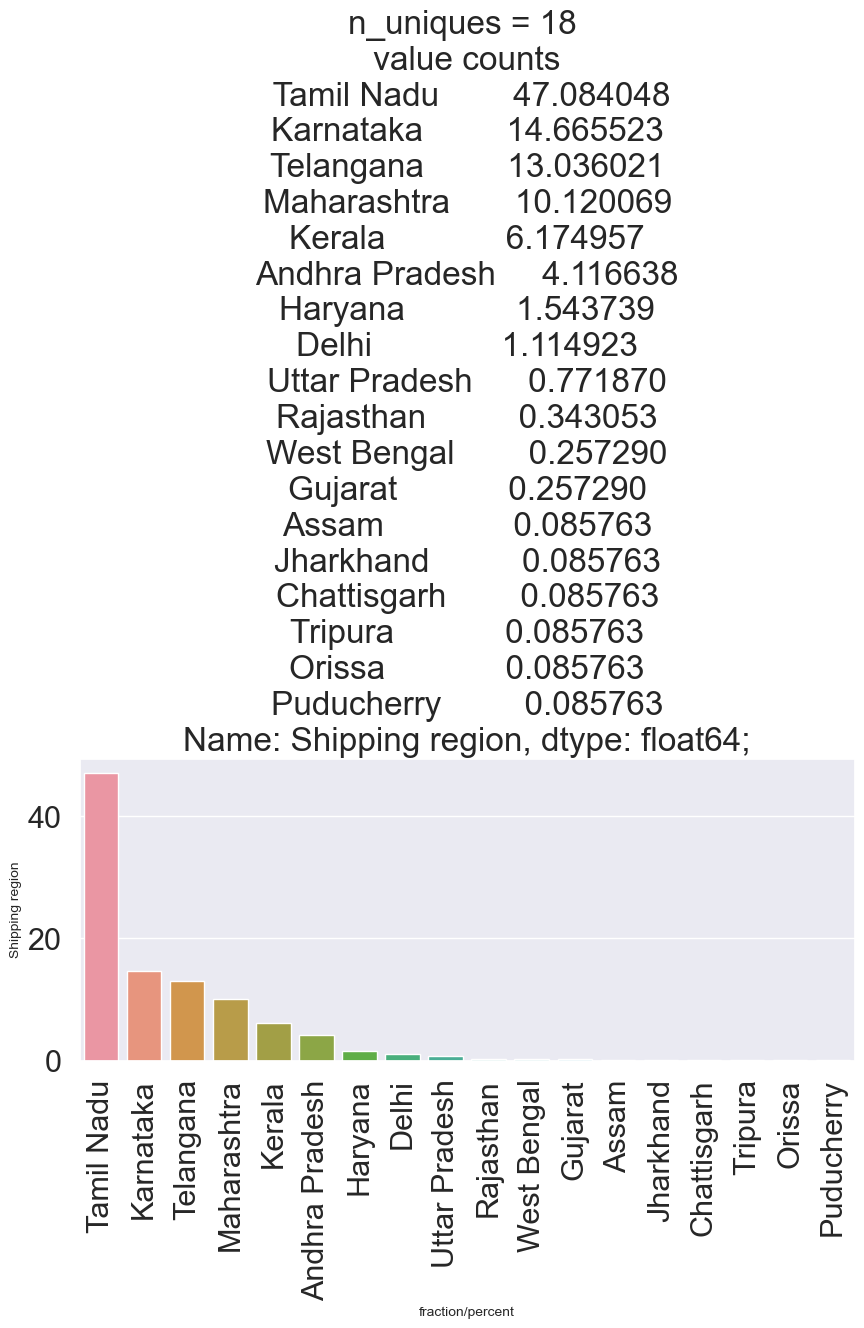

In [157]:
# State
UVA_category(df_india, ['Shipping region'])

- About 47% of the orders are from Tamil nadu, 14% and 13% from Karnataka & Telangana Respectively. 
- There are extremely less orders from states like Chattisgarh, Puducherry, Jharkand 

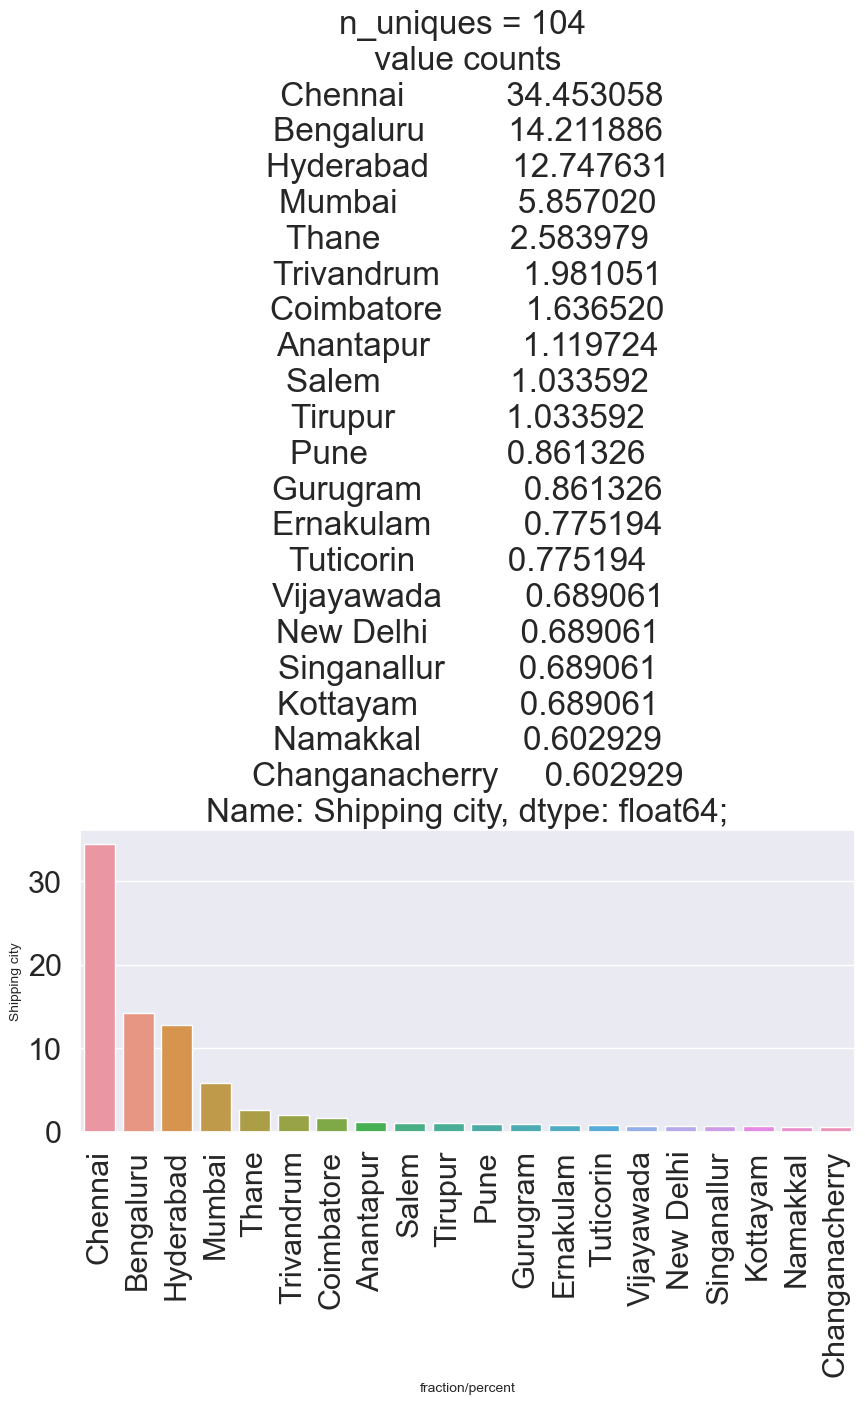

In [158]:
# State top 12
def UVA_category_top(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (10*size,4), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True).nlargest(20) * 100 
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(y= norm_count, x = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.xticks(rotation = 90)
    plt.ylabel('{}'.format(i), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
UVA_category_top(df_india, ['Shipping city'])

Majority of the orders are from Chennai at 34% followed by Bengaluru which is 14% and Hyd at 12% 

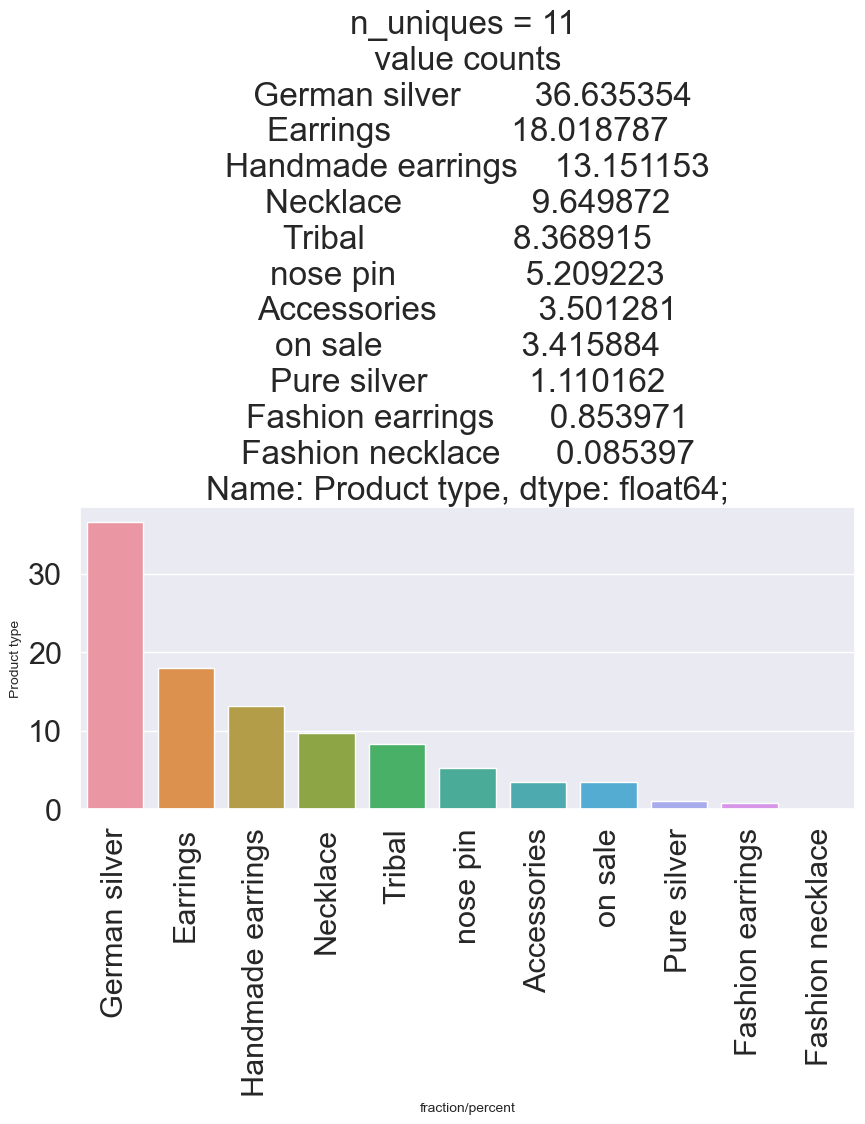

In [159]:
# Product type
UVA_category(df_india, ['Product type'])

- German Silver is the most purchased product type. followed by Earrings, and Handmade Earrings. 
- fashion earrings, Fashion necklace are the least bought.

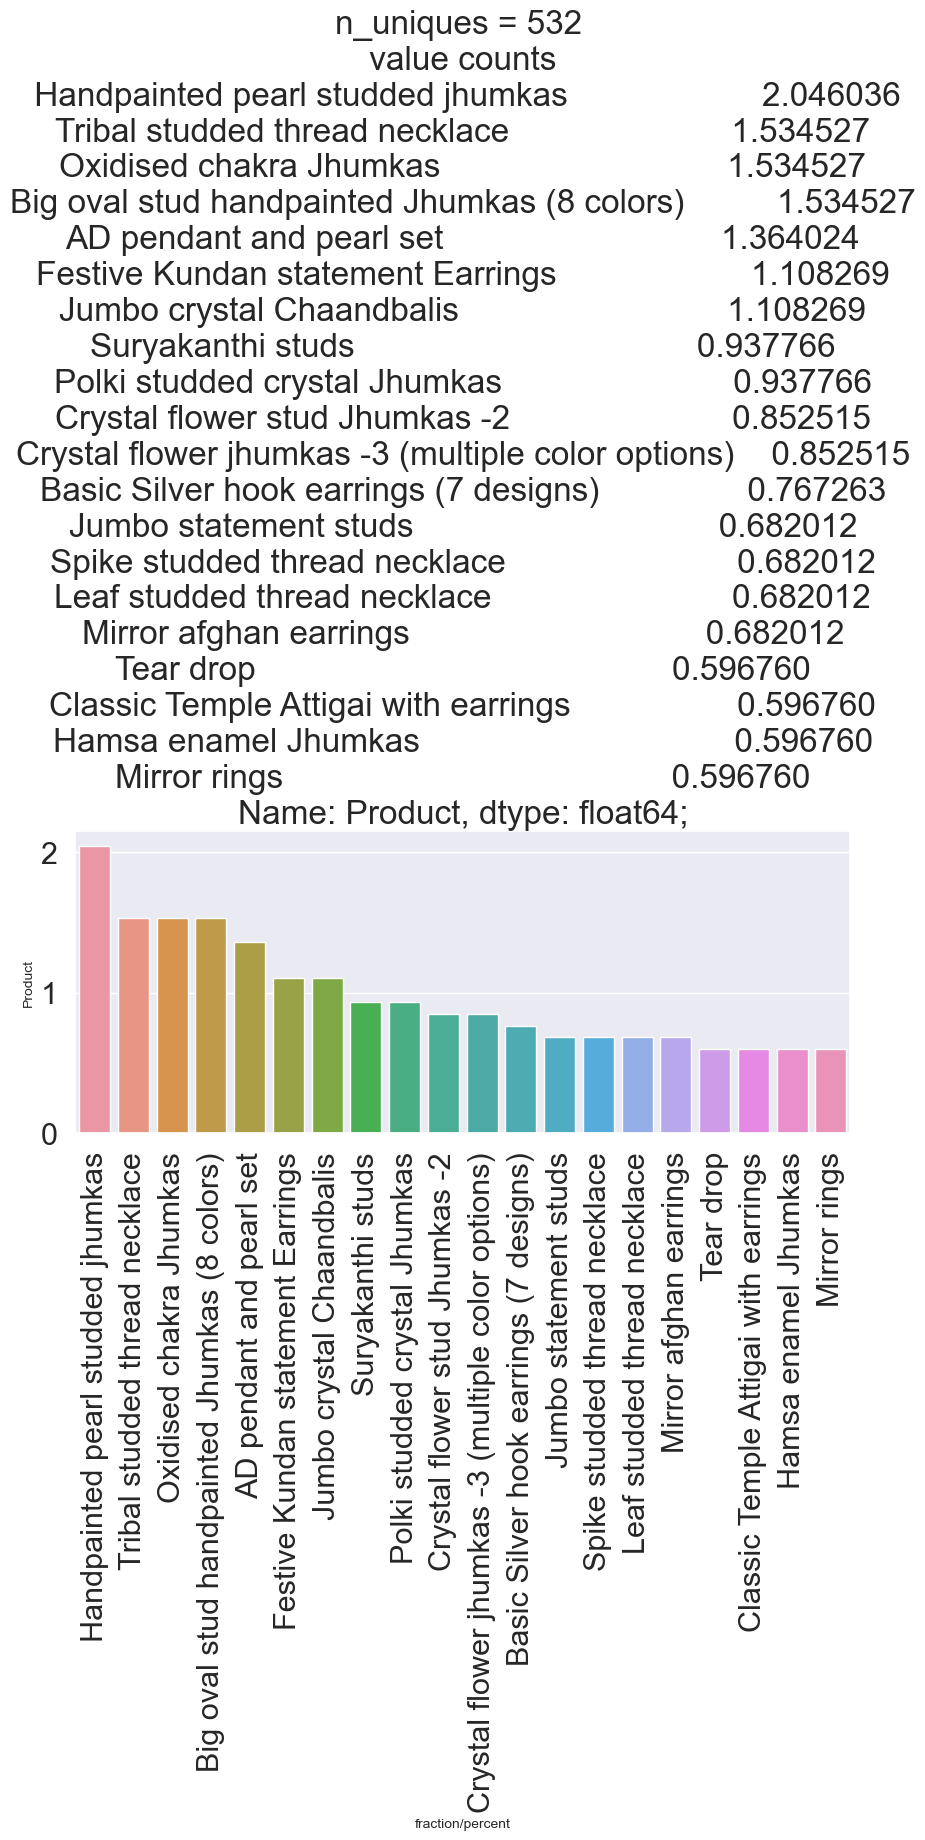

In [160]:
# Product top 
UVA_category_top(df_india, ['Product'])

- Handpainted pearl studded Jhumkas were most purchased item. Followed by Oxidised Chakra Jhumkas, Tribal studded thread necklace.

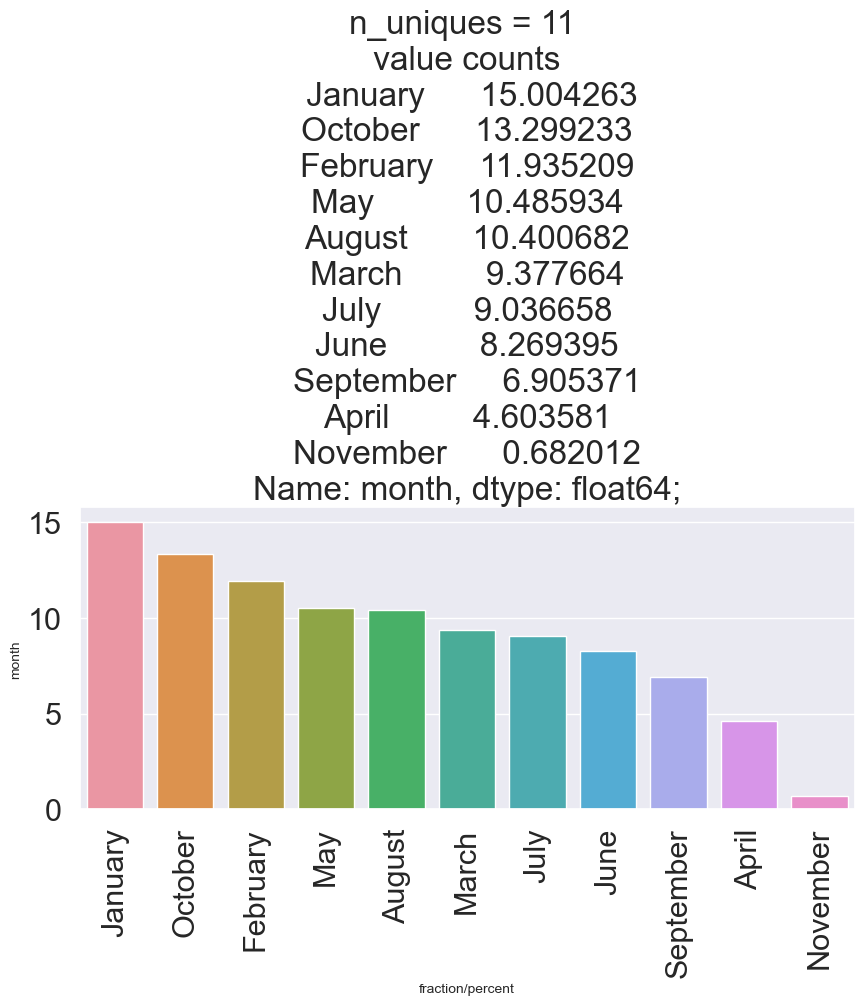

In [161]:
# Month 
UVA_category(df_india, ['month'])

- January, October and feb accounts about 40% of the purchases. November and april were the least. 

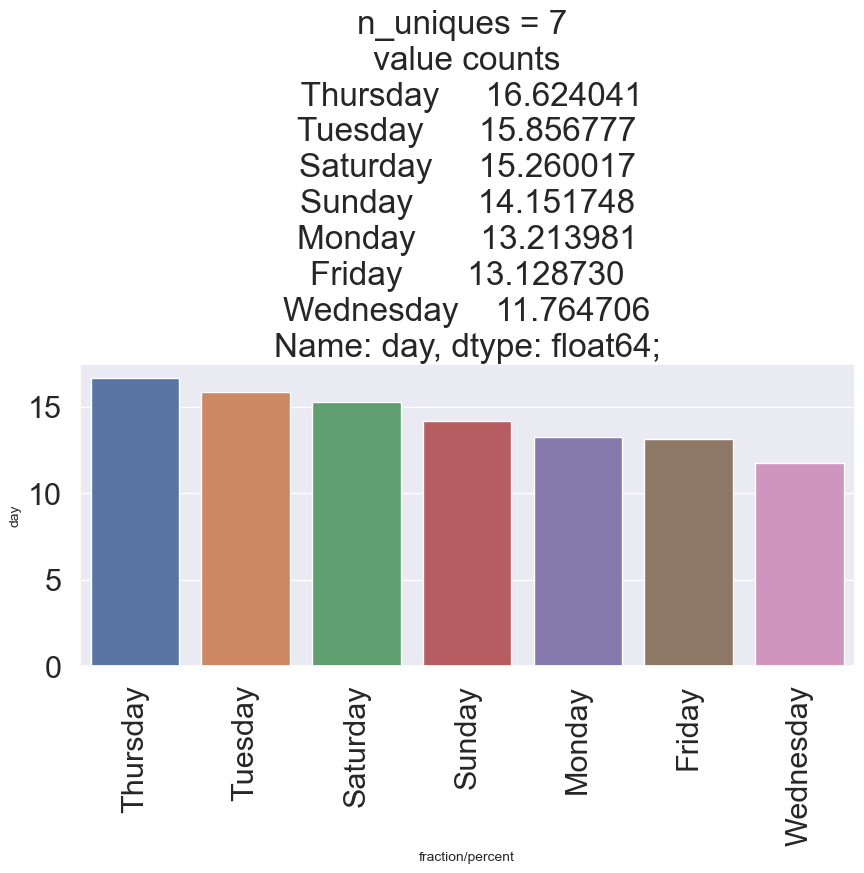

In [162]:
# day 
UVA_category(df_india, ['day'])

- Thursdays, Tuesdays and Saturday have high volume of purchases And wednesdays are the least. 

## Univariate Numerical analysis: 

In [163]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    std = data[i].std()
     

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; std = {}; range = {}\nmean = {}; median = {})'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2), round(std),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

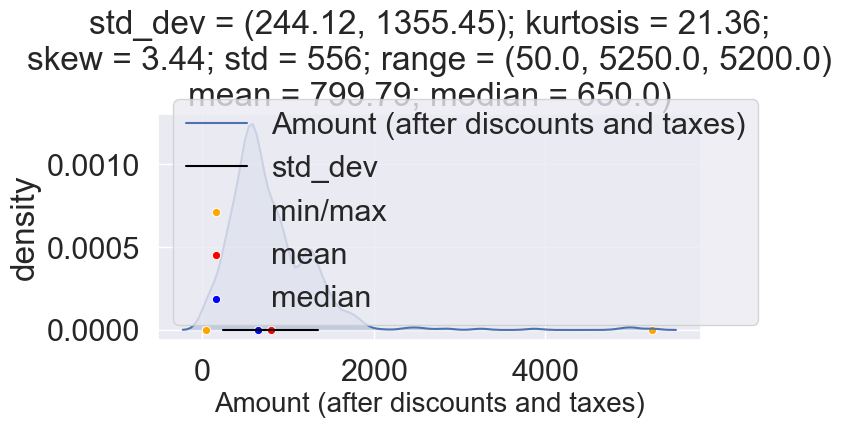

In [164]:
# Total amount: 
UVA_numeric(df_india, ['Amount (after discounts and taxes)'])

C:\Users\akilm\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


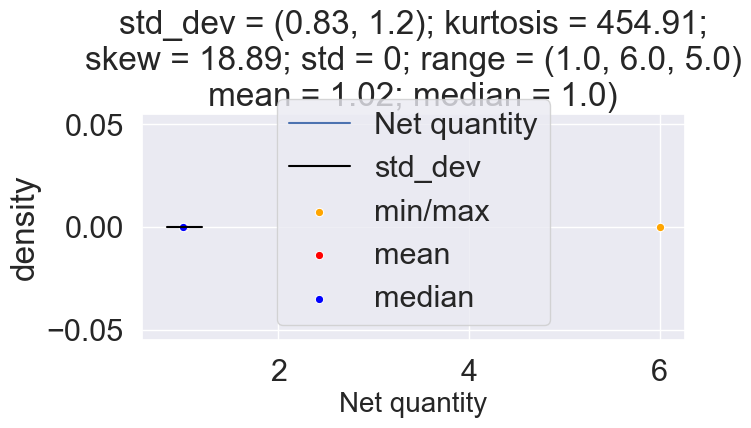

In [165]:
# Net quantity
UVA_numeric(df_india, ['Net quantity'])

## Bivariate: 

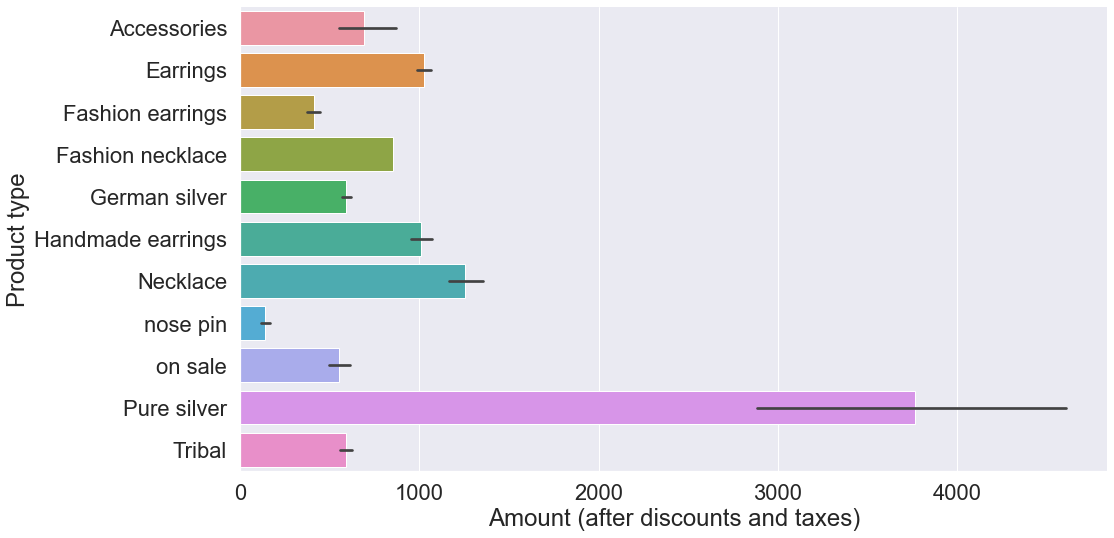

In [166]:
# avg sales per Product type 
sns.catplot(x = 'Amount (after discounts and taxes)', y= 'Product type', data = df_india, kind = 'bar', aspect = 2, height = 8 )
# sns.set(font_scale=1)

- Pure silver is the most profitable Produt type and Nose pin is the least. 

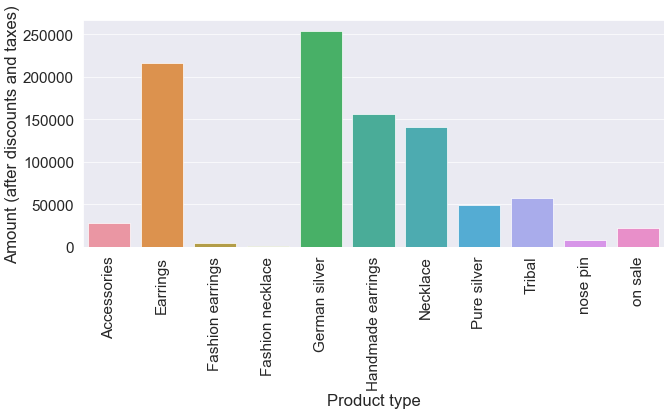

In [167]:
# Sum of sales per product type: 
pt = df_india.groupby('Product type')['Amount (after discounts and taxes)'].sum() 
pt = pt.reset_index() 
plt.figure(figsize=(15,6), dpi = 50)
sns.barplot( 'Product type', 'Amount (after discounts and taxes)', data = pt);
plt.xticks(rotation = 90);

- Total profit from German silver is the most, followed by Earrings. Although Pure silver was the highest in terms of average profit, its 1/5th of German silver in total. 
- Fashion earrings and Fashion necklace are the least. 

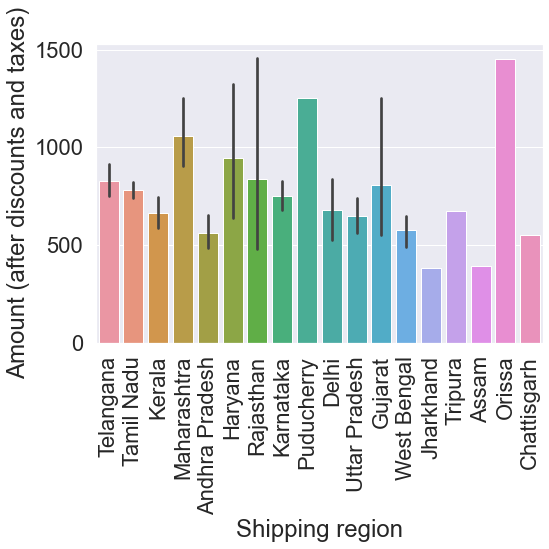

In [168]:
# Amount vs state 
sns.barplot('Shipping region','Amount (after discounts and taxes)', data = df_india)
plt.xticks(rotation = 90);

In [169]:
df_india.to_csv('ammu.csv')

## Correlation

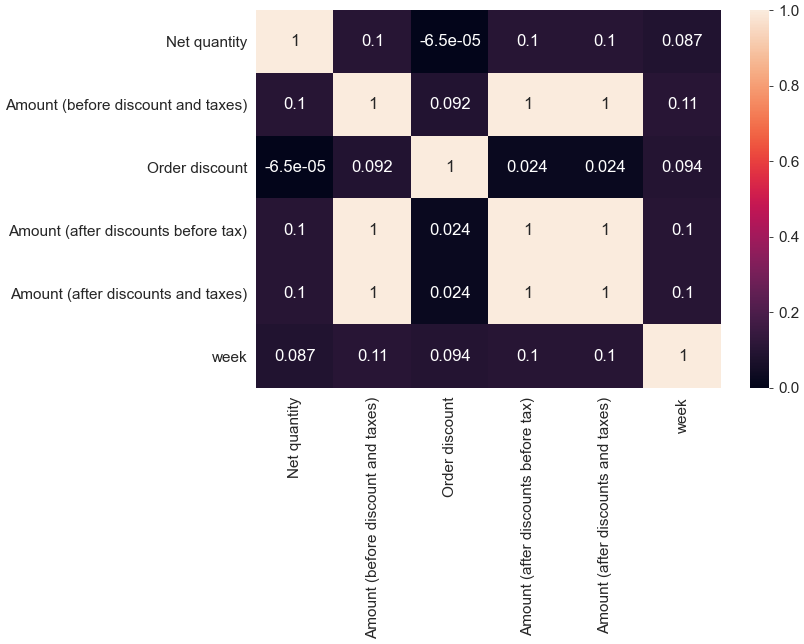

In [170]:
plt.figure(dpi = 50, figsize = (15,10))
sns.heatmap(df_india.corr(), annot = True) 

In [171]:
c = df_india.corr().abs() 
s = c.unstack() 
so = s.sort_values(kind = 'quicksort', ascending = False) 
so = pd.DataFrame(so, columns = ['Pearson Corr'])
so[so['Pearson Corr']<1]

Pearson Corr
Amount (after discounts and taxes)  Amount (after discounts before tax)      0.999993
Amount (after discounts before tax) Amount (after discounts and taxes)       0.999993
Amount (before discount and taxes)  Amount (after discounts before tax)      0.997704
Amount (after discounts before tax) Amount (before discount and taxes)       0.997704
Amount (before discount and taxes)  Amount (after discounts and taxes)       0.997696
Amount (after discounts and taxes)  Amount (before discount and taxes)       0.997696
Amount (before discount and taxes)  week                                     0.107874
week                                Amount (before discount and taxes)       0.107874
Amount (after discounts before tax) Net quantity                             0.102674
Net quantity                        Amount (after discounts before tax)      0.102674
Amount (after discounts and taxes)  Net quantity                             0.102669
Net quantity                        Amount (after discounts and taxes)       0.102669
Amount (before discount and taxes)  Net quantity                             0.102267
Net quantity                        Amount (before discount and taxes)       0.102267
Amount (after discounts before tax) week                                     0.101873
week                                Amount (after discounts before tax)      0.101873
                                    Amount (after discounts and taxes)       0.101795
Amount (after discounts and taxes)  week                                     0.101795
week                                Order discount                           0.094466
Order discount                      week                                     0.094466
                                    Amount (before discount and taxes)       0.091644
Amount (before discount and taxes)  Order discount                           0.091644
week                                Net quantity                             0.086797
Net quantity                        week                                     0.086797
Order discount                      Amount (after discounts before tax)      0.023990
Amount (after discounts before tax) Order discount                           0.023990
Order discount                      Amount (after discounts and taxes)       0.023976
Amount (after discounts and taxes)  Order discount                           0.023976
Order discount                      Net quantity                             0.000065
Net quantity                        Order discount                           0.000065

***

## Lets perform MBA on our data

In [172]:
df_india.head()

Date     Order Transaction type Sale type  \
0 2018-10-05 15:53:54+05:30  #HOJ2251          product     order   
3 2018-01-28 14:10:12+05:30  #HOJ1673          product     order   
4 2018-02-10 14:02:29+05:30  #HOJ1701          product     order   
5 2018-06-20 21:47:13+05:30  #HOJ2009          product     order   
7 2018-06-25 20:49:57+05:30  #HOJ2019          product     order   

  Sales channel Billing country Billing region       Billing city  \
0  Online Store           India      Telangana          Hyderabad   
3  Online Store           India     Tamil Nadu            Chennai   
4  Online Store           India         Kerala  Thiruvanathapuram   
5  Online Store           India         Kerala         Trivandrum   
7  Online Store           India    Maharashtra             Mumbai   

  Shipping country Shipping region  ... Variant Net quantity  \
0            India       Telangana  ...     NaN          1.0   
3            India      Tamil Nadu  ...       4          1.0   
4            India          Kerala  ...       3          1.0   
5            India          Kerala  ...     NaN          1.0   
7            India     Maharashtra  ...     NaN          1.0   

  Amount (before discount and taxes) Order discount  \
0                              550.0            0.0   
3                              200.0            0.0   
4                              200.0            0.0   
5                             1200.0            0.0   
7                              650.0            0.0   

  Amount (after discounts before tax)  Amount (after discounts and taxes)  \
0                               550.0                               550.0   
3                               200.0                               200.0   
4                               200.0                               200.0   
5                              1200.0                              1200.0   
7                               650.0                               650.0   

      month        day  week        date  
0   October     Friday    40  2018-10-05  
3   January     Sunday     4  2018-01-28  
4  February   Saturday     6  2018-02-10  
5      June  Wednesday    25  2018-06-20  
7      June     Monday    26  2018-06-25  

[5 rows x 24 columns]

In [173]:
df_india.date = pd.to_datetime(df_india.date)

C:\Users\akilm\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [252]:
mba=df_india[['date','Order','Product type','Net quantity', 'Product']]

In [253]:
mba.head()

date     Order Product type  Net quantity                  Product
0 2018-10-05  #HOJ2251  Accessories           1.0           AD bridal tika
3 2018-01-28  #HOJ1673  Accessories           1.0  Adjustable silver rings
4 2018-02-10  #HOJ1701  Accessories           1.0  Adjustable silver rings
5 2018-06-20  #HOJ2009  Accessories           1.0     Bridal Kemp head set
7 2018-06-25  #HOJ2019  Accessories           1.0            Bridal Tika 1

In [254]:
mba['Net quantity'].unique()

array([1., 2., 6., 3.])

In [255]:
grouped = mba.groupby(['Order','Product type']).size().reset_index(name='Net quantity')
grouped

Order   Product type  Net quantity
0    #HOJ1566  German silver             1
1    #HOJ1566         Tribal             1
2    #HOJ1566       nose pin             3
3    #HOJ1567       Necklace             1
4    #HOJ1568       Necklace             1
..        ...            ...           ...
852  #HOJ2332  German silver             1
853  #HOJ2333       Necklace             1
854  #HOJ2334         Tribal             3
855  #HOJ2335  German silver             2
856  #HOJ2335        on sale             1

[857 rows x 3 columns]

In [256]:
basket = (grouped.groupby(['Order', 'Product type'])['Net quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order'))
basket

Product type  Accessories  Earrings  Fashion earrings  Fashion necklace  \
Order                                                                     
#HOJ1566              0.0       0.0               0.0               0.0   
#HOJ1567              0.0       0.0               0.0               0.0   
#HOJ1568              0.0       0.0               0.0               0.0   
#HOJ1569              0.0       0.0               0.0               0.0   
#HOJ1570              0.0       0.0               0.0               0.0   
...                   ...       ...               ...               ...   
#HOJ2331              0.0       1.0               0.0               0.0   
#HOJ2332              0.0       0.0               0.0               0.0   
#HOJ2333              0.0       0.0               0.0               0.0   
#HOJ2334              0.0       0.0               0.0               0.0   
#HOJ2335              0.0       0.0               0.0               0.0   

Product type  German silver  Handmade earrings  Necklace  Pure silver  Tribal  \
Order                                                                           
#HOJ1566                1.0                0.0       0.0          0.0     1.0   
#HOJ1567                0.0                0.0       1.0          0.0     0.0   
#HOJ1568                0.0                0.0       1.0          0.0     1.0   
#HOJ1569                0.0                1.0       0.0          0.0     0.0   
#HOJ1570                0.0                1.0       0.0          0.0     0.0   
...                     ...                ...       ...          ...     ...   
#HOJ2331                0.0                0.0       0.0          0.0     0.0   
#HOJ2332                1.0                0.0       0.0          0.0     0.0   
#HOJ2333                0.0                0.0       1.0          0.0     0.0   
#HOJ2334                0.0                0.0       0.0          0.0     3.0   
#HOJ2335                2.0                0.0       0.0          0.0     0.0   

Product type  nose pin  on sale  
Order                            
#HOJ1566           3.0      0.0  
#HOJ1567           0.0      0.0  
#HOJ1568           0.0      0.0  
#HOJ1569           0.0      0.0  
#HOJ1570           0.0      0.0  
...                ...      ...  
#HOJ2331           0.0      1.0  
#HOJ2332           0.0      0.0  
#HOJ2333           0.0      0.0  
#HOJ2334           0.0      0.0  
#HOJ2335           0.0      1.0  

[656 rows x 11 columns]

In [257]:
# The encoding function
# encoding function will convert all the postive values into 1 and negative values into 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
# apply the function here for the dataset    
basket_sets = basket.applymap(encode_units)
basket_sets.columns


Index(['Accessories', 'Earrings', 'Fashion earrings', 'Fashion necklace',
       'German silver', 'Handmade earrings', 'Necklace', 'Pure silver',
       'Tribal', 'nose pin', 'on sale'],
      dtype='object', name='Product type')

In [258]:
basket_sets.sample(10)

Product type  Accessories  Earrings  Fashion earrings  Fashion necklace  \
Order                                                                     
#HOJ2100                0         0                 0                 0   
#HOJ1863                0         0                 0                 0   
#HOJ2057                0         0                 0                 0   
#HOJ1724                0         1                 0                 0   
#HOJ1570                0         0                 0                 0   
#HOJ2174                0         0                 0                 0   
#HOJ2162                0         0                 0                 0   
#HOJ1690                0         1                 0                 0   
#HOJ2321                0         1                 0                 0   
#HOJ1629                0         0                 0                 0   

Product type  German silver  Handmade earrings  Necklace  Pure silver  Tribal  \
Order                                                                           
#HOJ2100                  1                  0         0            0       0   
#HOJ1863                  1                  0         0            0       0   
#HOJ2057                  1                  0         0            0       0   
#HOJ1724                  0                  0         0            0       0   
#HOJ1570                  0                  1         0            0       0   
#HOJ2174                  1                  0         0            0       0   
#HOJ2162                  1                  0         0            0       0   
#HOJ1690                  0                  0         0            0       0   
#HOJ2321                  0                  0         0            0       0   
#HOJ1629                  0                  0         1            0       0   

Product type  nose pin  on sale  
Order                            
#HOJ2100             0        0  
#HOJ1863             0        0  
#HOJ2057             0        0  
#HOJ1724             0        0  
#HOJ1570             0        0  
#HOJ2174             0        0  
#HOJ2162             0        0  
#HOJ1690             0        0  
#HOJ2321             0        0  
#HOJ1629             0        0

## Training

In [261]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)


In [262]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)
rules.head() 

antecedents      consequents  antecedent support  consequent support  \
0       (nose pin)  (German silver)            0.057927            0.416159   
1  (German silver)       (nose pin)            0.416159            0.057927   

    support  confidence     lift  leverage  conviction  
0  0.036585    0.631579  1.51764  0.012479    1.584713  
1  0.036585    0.087912  1.51764  0.012479    1.032875

- (Earrings, Tribal) >> (German silver) <br>
- (Earrings, Tribal) << (German silver)

- We have sorted based on high lift value as we know, higher the lift greater the association. So for instance we can say, Chance of **(German silver)** being purchased is higher when **(Earrings, Tribal)** are purchased, considering the popularity of **(German Silver)**. So we can bundle them up to boost sales. 
- Same applies to **(Earrings, German silver) and (Handmade earrings)**	followed by few other combinations that could bring in improvement. 
- On the other hand, We might have to consider coming up with offers on bundling **(Necklace) & (Earrings, German silver)** to increase its sales. 



##### The above may require attention like offers and promotion to boost the sales.

***